In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## Features
- Clump thickness
is a measure of how thick the cells are within a tumor. Benign cells tend to be grouped in mono-layers, while cancerous - in multi-layer.(Sarkar et al. 2017, p. 1)

- Uniformity
of cell size and uniformity of cell shape are two characteristics that can be used to describe the appearance of cells under a microscope. Here we are checking the degree to which the cells in a sample are similar in size and shape.

- Marginal adhesion
is the degree to which cells in a tissue sample adhere, or stick, to one another at the edges of the sample. Loss of adhesion might be a sign of malignancy.

- Single
epithelial cell size is the size of individual cells in an epithelial tissue sample. Epithelial tissue is a type of tissue that covers the surface of the body and lines internal organs and structures. It is made up of cells that are tightly packed together and held in place by specialized junctions.

- Bare nuclei
refers to cells in a tissue sample that are missing their cell membranes and cytoplasm, leaving only the nucleus visible.

- Bland
chromatin is the appearance of the genetic material (chromatin) in the nucleus of a cell under a microscope. Chromatin is made up of DNA and proteins, and it contains the genetic information that controls the cell’s functions. When the chromatin in a cell’s nucleus is compact and uniform in appearance, it is said to be “bland.”

- Normal
nucleoli are small, spherical structures found within the nucleus of a cell. They are composed of DNA, RNA, and proteins and are responsible for synthesizing ribosomes, which are the cellular structures that produce proteins. Nucleoli are usually visible under a microscope and can vary in size and appearance depending on the stage of the cell cycle and the cell’s function. In normal, healthy cells, nucleoli are usually small and have a distinct, well-defined border.

- Mitosis
is the process of cell division that occurs in all living organisms. During mitosis, a single cell divides into two daughter cells, each of which contains a copy of the parent cell’s DNA. The process of mitosis is essential for the growth and repair of tissues and the production of new cells.

In [2]:
dataset = pd.read_csv('.\\project\\breast_cancer\\breast_cancer.csv')
dataset.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Statistics

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [4]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## EDA and visualization

In [5]:
dataset.isna().any()

Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [6]:
dataset['Class'].unique()

array([2, 4], dtype=int64)

There are only two classes in this task, where 2 represents *benign* and 4 is *maglinant*. In the following process, I will replace 2 with **0** and 4 with **1**.

In [7]:
dataset.loc[dataset['Class'] == 2, 'Class'] = 0
dataset.loc[dataset['Class'] == 4, 'Class'] = 1
dataset['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
dataset['Class'].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

The number of data in the class *benign* is 444, and the number of data in the class *maglinant* is 239. The data here exhibits a certain degree of class imbalance, which might be a common and natural occurrence in medical data, where the number of cases with varying degrees of disease is unbalanced.

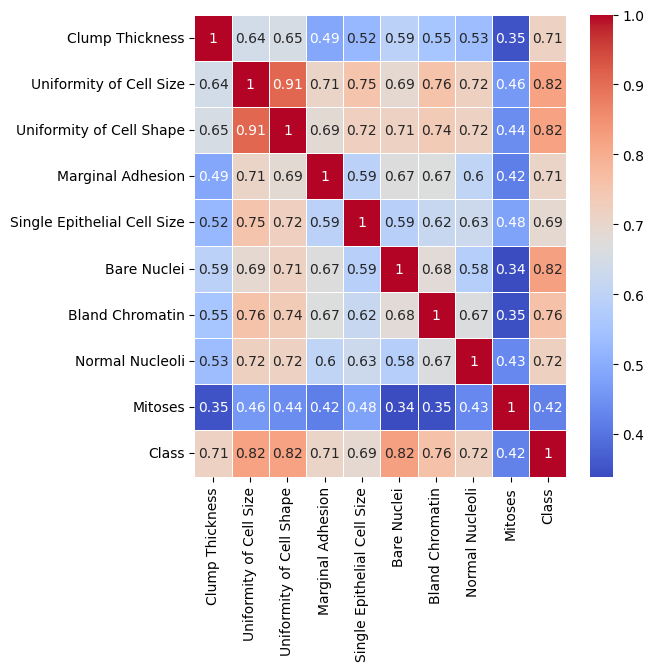

In [9]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, cmap='coolwarm', ax=ax)
plt.show()

Except for the **Mitoses** feature, all other features show a relatively strong correlation with the class. Therefore, we will discuss the model's performance both with and without the use of the **Mitoses** feature. Additionally, the features **Uniformity of Cell Size** and **Uniformity of Cell Shape** have a very strong correlation, leading us to believe they might exhibit slight collinearity and could contain redundant information. Consequently, we have decided to remove the **Uniformity of Cell Shape** feature and only use the **Uniformity of Cell Size** feature.

In [10]:
dataset2 = dataset[dataset['Class'] == 0]
dataset4 = dataset[dataset['Class'] == 1]

Column:  Clump Thickness ; Skewness:  0.59 ; Kurtosis:  -0.64
Column:  Uniformity of Cell Size ; Skewness:  1.22 ; Kurtosis:  0.06
Column:  Uniformity of Cell Shape ; Skewness:  1.16 ; Kurtosis:  -0.03
Column:  Marginal Adhesion ; Skewness:  1.51 ; Kurtosis:  0.93
Column:  Single Epithelial Cell Size ; Skewness:  1.7 ; Kurtosis:  2.11
Column:  Bare Nuclei ; Skewness:  0.99 ; Kurtosis:  -0.8
Column:  Bland Chromatin ; Skewness:  1.09 ; Kurtosis:  0.16
Column:  Normal Nucleoli ; Skewness:  1.42 ; Kurtosis:  0.46
Column:  Mitoses ; Skewness:  3.5 ; Kurtosis:  12.17
Column:  Class ; Skewness:  0.63 ; Kurtosis:  -1.6


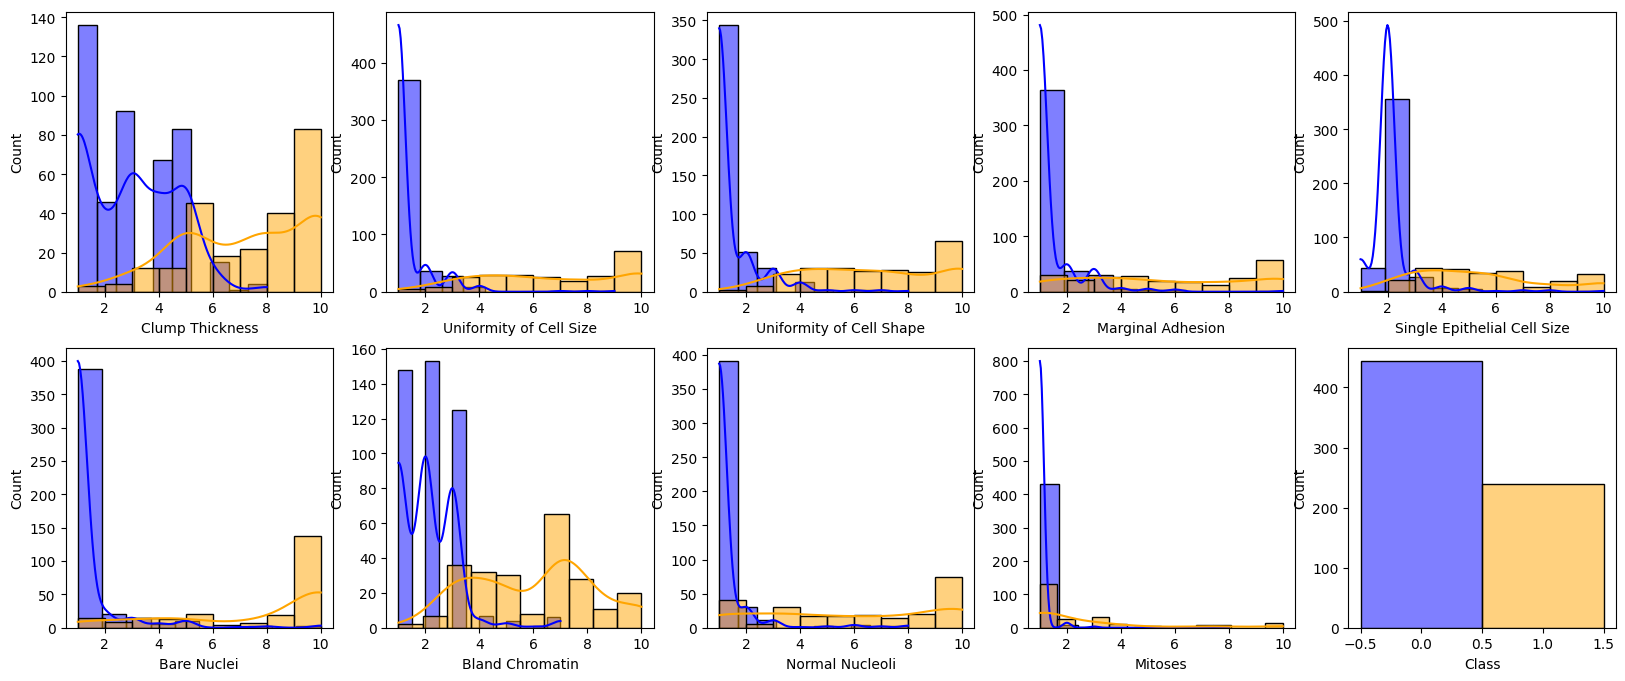

In [11]:
plt.rcParams["figure.figsize"] = (20,8)
fig = plt.figure()
i = 1

for col in dataset.columns:
    if col == 'Serial No.':
        continue
    plt.subplot(2, 5, i)
    sns.histplot(dataset2[col], kde=True, color='blue')
    sns.histplot(dataset4[col], kde=True, color='orange')
    plt.xlabel(col)
    i += 1
    print("Column: ", col, "; Skewness: ", round(scipy.stats.skew(dataset[col]), 2), "; Kurtosis: ", round(scipy.stats.kurtosis(dataset[col]), 2))

plt.show()

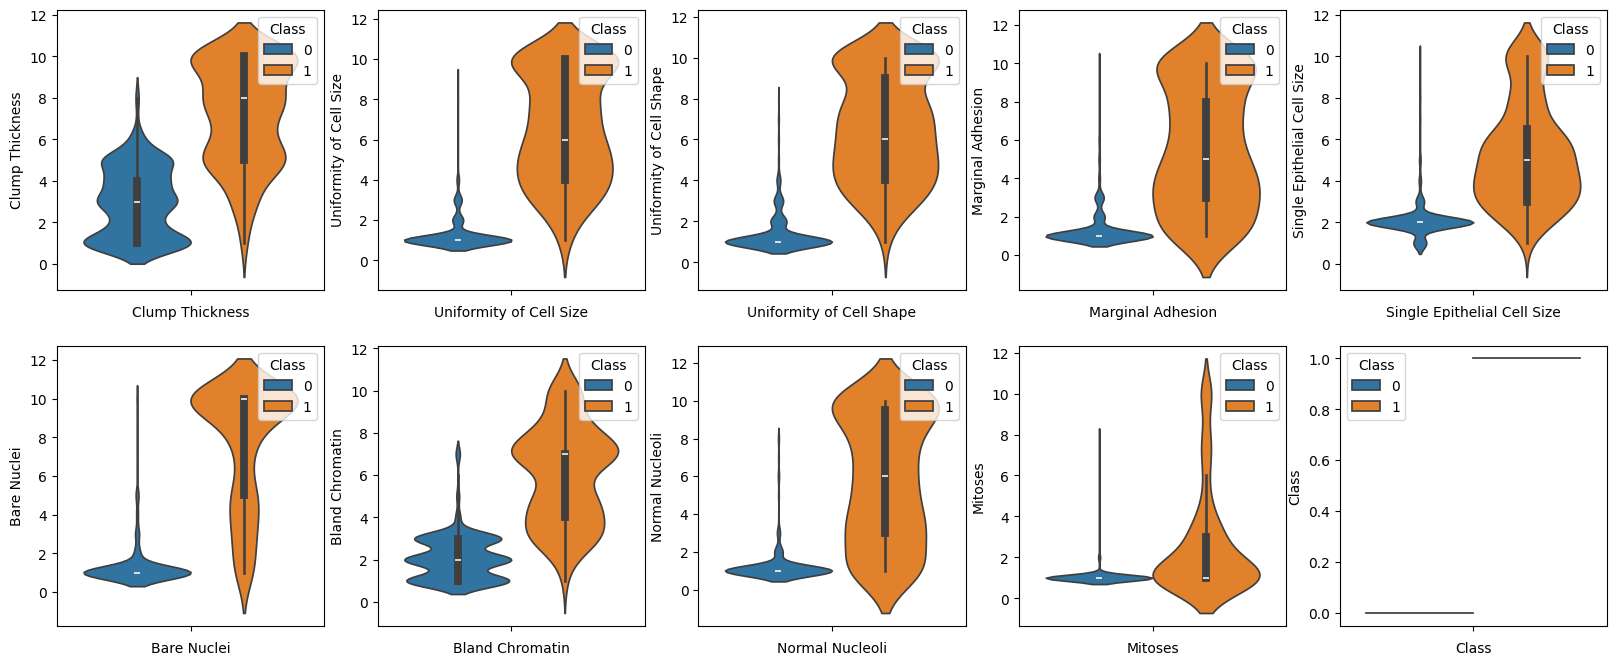

In [12]:
plt.rcParams["figure.figsize"] = (20,8)
fig = plt.figure()
i = 1

for col in dataset.columns:
    if col == 'Serial No.':
        continue
    plt.subplot(2, 5, i)
    sns.violinplot(y=col, hue='Class', data=dataset)
    plt.xlabel(col)
    i += 1
    # print("Column: ", col, "; Skewness: ", scipy.stats.skew(dataset[col]), "; Kurtosis: ", scipy.stats.kurtosis(dataset[col]))

plt.show()

## Principle Component Analysis

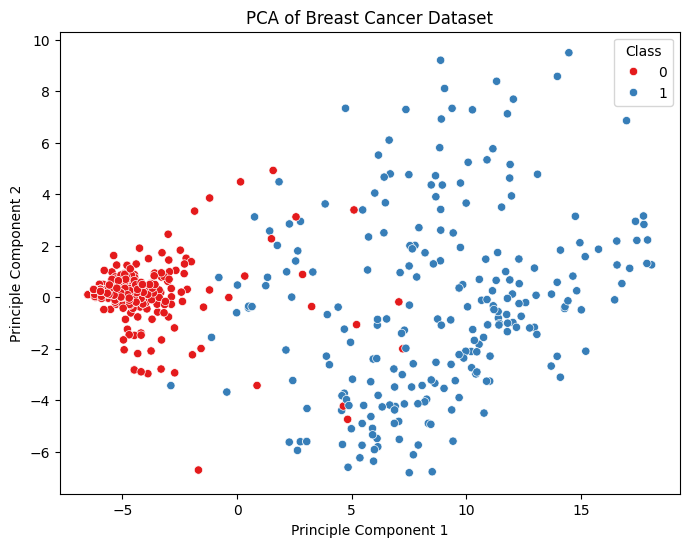

In [28]:
from sklearn.decomposition import PCA

y_pca = dataset['Class']
X_pca = dataset.drop(['Class'], axis=1)
X_pca.head()

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_pca)


pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Class'] = y_pca


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set1')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title('PCA of Breast Cancer Dataset')
plt.show()


We conducted principal component analysis (PCA) on these features. For ease of visualization, we selected first two principal components. From the figure, we can observe that most of the data can be clearly separated, indicating that the features in the dataset are sufficient to distinguish between these two categories. Secondly, it suggests that two principal components have captured important information related to the categories.

## Logistic Regression with Lasso (L1) Regularization

In this section, we first use Logistic Regression with Lasso Regularization to fit the data, the reason we choose Lasso regulariaztion is that it tends to generate sparse coefficients and can perform automatic feature selection. We would like to verify our assumption that the feature **Mitoses** may have lower feature importance.

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
scaled_dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


We first use the MinMax normalization to rescale all the data samples to 0~1

#### Classification Using **Mitoses**

In [14]:
y = scaled_dataset['Class']
X = scaled_dataset.drop(['Class', 'Uniformity of Cell Shape'], axis=1)
X.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [15]:
repeat = 100
coefs = np.zeros((1, 8))
accs, pres, recs, f1s = [], [], [], []
for seed in range(repeat):
    X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=seed)
    reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    coefs = np.vstack([coefs, reg.coef_])
    accs.append(accuracy_score(y_pred, y_test))
    pres.append(precision_score(y_pred, y_test))
    recs.append(recall_score(y_pred, y_test))
    f1s.append(f1_score(y_pred, y_test))
average_acc = np.mean(accs)
average_pre = np.mean(pres)
average_rec = np.mean(recs)
average_f1 = np.mean(f1s)
print("Average accuracy over 100 seeds: ", average_acc)
print("Average precision over 100 seeds: ", average_pre)
print("Average recall over 100 seeds: ", average_rec)
print("Average F1 score over 100 seeds: ", average_f1)

Average accuracy over 100 seeds:  0.963941605839416
Average precision over 100 seeds:  0.9336165371860407
Average recall over 100 seeds:  0.9643542169502547
Average F1 score over 100 seeds:  0.9481408580239851


In [16]:
coef_importances = []
for f in range(coefs.shape[1]):
    coef_importances.append(sum(coefs[1:, :][:, f] == 0))
print("# of times that a coefficient is regularized to 0 in 100 trials, averaged coefficients over 100 trials")
for f in range(len(coef_importances)):
    print(X.columns[f], ": ", coef_importances[f], np.mean(coefs[1:, :][:, f]))

# of times that a coefficient is regularized to 0 in 100 trials, averaged coefficients over 100 trials
Clump Thickness :  0 3.7343139244000008
Uniformity of Cell Size :  0 2.717462782878581
Marginal Adhesion :  1 1.6550350115348778
Single Epithelial Cell Size :  35 0.3279650595535712
Bare Nuclei :  0 3.436724848997547
Bland Chromatin :  0 2.2368092079512505
Normal Nucleoli :  0 1.7685016907033166
Mitoses :  31 0.43025082351412053


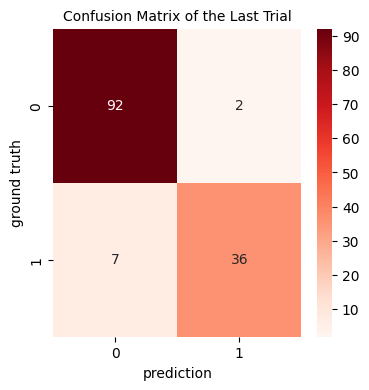

In [17]:
f,ax = plt.subplots(figsize=(4, 4))
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cmap='Reds', ax=ax)
plt.xlabel('prediction',fontsize=10, color='k') 
plt.ylabel('ground truth',fontsize=10, color='k') 
plt.title('Confusion Matrix of the Last Trial',fontsize=10) 
plt.show()

#### Classification Without **Mitoses**

In [18]:
y = scaled_dataset['Class']
X = scaled_dataset.drop(['Class', 'Mitoses', 'Uniformity of Cell Shape'], axis=1)
X.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000


In [19]:
repeat = 100
accs, pres, recs, f1s = [], [], [], []
for seed in range(repeat):
    X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=seed)
    reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    accs.append(accuracy_score(y_pred, y_test))
    pres.append(precision_score(y_pred, y_test))
    recs.append(recall_score(y_pred, y_test))
    f1s.append(f1_score(y_pred, y_test))
average_acc = np.mean(accs)
average_pre = np.mean(pres)
average_rec = np.mean(recs)
average_f1 = np.mean(f1s)
print("Average accuracy over 100 seeds: ", average_acc)
print("Average precision over 100 seeds: ", average_pre)
print("Average recall over 100 seeds: ", average_rec)
print("Average F1 score over 100 seeds: ", average_f1)

Average accuracy over 100 seeds:  0.9637956204379562
Average precision over 100 seeds:  0.9336165371860408
Average recall over 100 seeds:  0.9638985376850241
Average F1 score over 100 seeds:  0.9479329526551278


After removing the feature **Mitoses**, the performance is not significantly impacted. Also, since we are facing the problem of data imbalance, it would be better to determine the model's performance by multiple metrics including precision, recall, and the F1 score. This task requires us to diagnose patients, and our preference might be to err on the side of misdiagnosing benign patients as malignant, while aiming to eliminate misdiagnosing malignant cases as benign, as this could impact subsequent treatment for the patients. Therefore, we hope to have as few False Negatives as possible in our prediction results, ultimately reflecting that the model should have a relatively high Recall score.

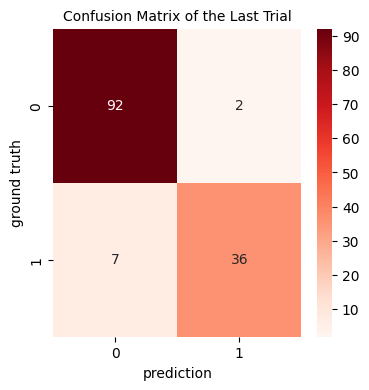

In [21]:
f,ax = plt.subplots(figsize=(4, 4))
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cmap='Reds', ax=ax)
plt.xlabel('prediction',fontsize=10, color='k') 
plt.ylabel('ground truth',fontsize=10, color='k') 
plt.title('Confusion Matrix of the Last Trial',fontsize=10) 
plt.show()

## Ensemble Method (Random Forest Classifier)
In this section, we apply ensemble method using decision trees to perform classification. Since decision tree and random forest may easily fall into the pit of overfitting, we first adjust the hyperparameters of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
y = scaled_dataset['Class']
X = scaled_dataset.drop(['Class', 'Uniformity of Cell Shape'], axis=1)
X.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


Max Score: 0.975149190110827 # of Subtrees: 101


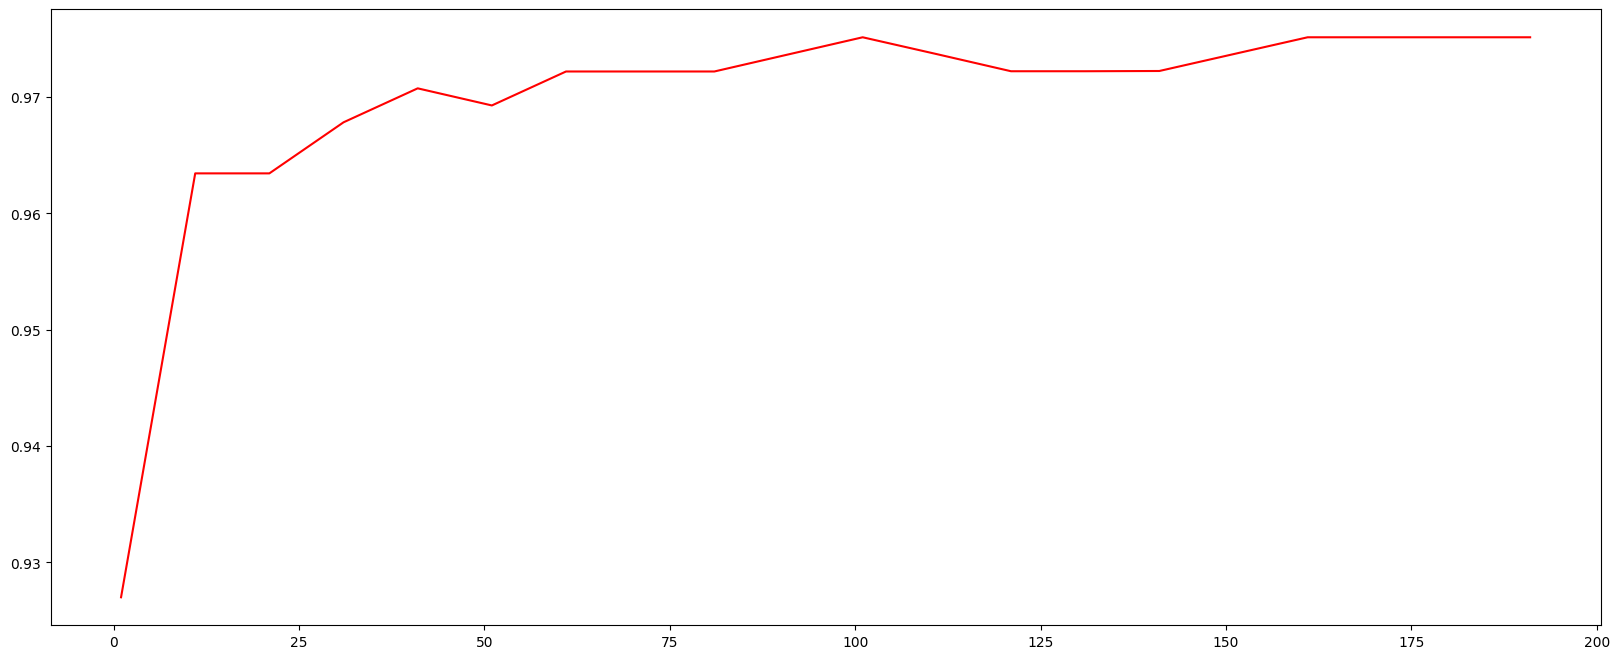

In [ ]:
scores = []

for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X, y, cv=10).mean()
    scores.append(score)
score_max = max(scores)
print('Max Score: {}'.format(score_max),
      '# of Subtrees: {}'.format(scores.index(score_max)*10+1))
scores

x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, scores, 'r-')
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators=101, random_state=90)

param_grid = {'max_depth':np.arange(1,20)}
grid_search = GridSearchCV(rfc, param_grid, cv=10)
grid_search.fit(X, y)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
print(best_param, best_score)

{'max_depth': 11} 0.975149190110827


In [ ]:
rfc = RandomForestClassifier(n_estimators=101, max_depth=11, random_state=90)

param_grid = {'max_features':np.arange(2, 8)}
grid_search = GridSearchCV(rfc, param_grid, cv=10)
grid_search.fit(X, y)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
print(best_param, best_score)

{'max_features': 2} 0.975149190110827


In [ ]:
repeat = 30
accs, pres, recs, f1s = [], [], [], []
for seed in range(repeat):
    X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=seed)
    rfc = RandomForestClassifier(n_estimators=101, max_depth=11, max_features=2, random_state=90)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    accs.append(accuracy_score(y_pred, y_test))
    pres.append(precision_score(y_pred, y_test))
    recs.append(recall_score(y_pred, y_test))
    f1s.append(f1_score(y_pred, y_test))
average_acc = np.mean(accs)
average_pre = np.mean(pres)
average_rec = np.mean(recs)
average_f1 = np.mean(f1s)
print("Average accuracy over 100 seeds: ", average_acc)
print("Average precision over 100 seeds: ", average_pre)
print("Average recall over 100 seeds: ", average_rec)
print("Average F1 score over 100 seeds: ", average_f1)

Average accuracy over 100 seeds:  0.9710462287104622
Average precision over 100 seeds:  0.9653970575259361
Average recall over 100 seeds:  0.9564685552134126
Average F1 score over 100 seeds:  0.9603058607509255


From the results, it is evident that the Random Forest classifier shows better performance than Logistic Regression. This is reflected in higher accuracy, precision, and F1 score. However, the recall of the Random Forest is lower, so there may need to be some trade-offs when choosing a model, or a comprehensive consideration of the results of both models might be necessary.

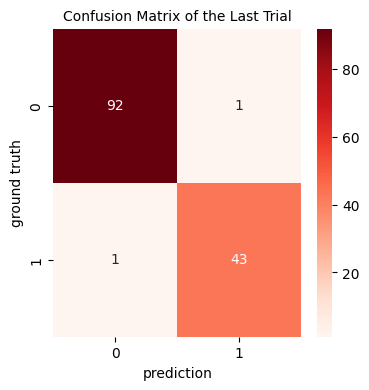

In [ ]:
f,ax = plt.subplots(figsize=(4, 4))
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cmap='Reds', ax=ax)
plt.xlabel('prediction',fontsize=10, color='k')
plt.ylabel('ground truth',fontsize=10, color='k')
plt.title('Confusion Matrix of the Last Trial',fontsize=10) 
plt.show()

In [ ]:
print("Feature Importances: ")
for i in range(len(rfc.feature_importances_)):
    print(X.columns[i], ": ", rfc.feature_importances_[i])

Feature Importances: 
Clump Thickness :  0.08366267428941776
Uniformity of Cell Size :  0.23130549919758006
Marginal Adhesion :  0.05624324358642101
Single Epithelial Cell Size :  0.15260336943106306
Bare Nuclei :  0.17630205743585942
Bland Chromatin :  0.19719900330291193
Normal Nucleoli :  0.09284592959291516
Mitoses :  0.00983822316383167


From the feature importances we can also tell that the **Mitoses** is less significant.